In [31]:
using PyCall
using PyPlot

In [2]:
pyabf=pyimport("pyabf")

PyObject <module 'pyabf' from '/home/karel/.local/lib64/python3.6/site-packages/pyabf/__init__.py'>

In [17]:
arx=pyabf[:ABF]("../ABFiles/Eduardo/CarbacholCA3.abf") # sintaxis similar a PyPlot.jl

PyObject ABFcore(abf="/home/karel/RafaelGutierrez/ABFiles/Eduardo/CarbacholCA3.abf", loadData=True)

In [18]:
canales=arx[:channelCount]

1

In [19]:
llaves=keys(arx)

101-element Array{Symbol,1}:
 :__class__        
 :__delattr__      
 :__dict__         
 :__dir__          
 :__doc__          
 :__eq__           
 :__format__       
 :__ge__           
 :__getattribute__ 
 :__gt__           
 :__hash__         
 :__init__         
 :__init_subclass__
 ⋮                 
 :sweepPointCount  
 :sweepTimesMin    
 :sweepTimesSec    
 :sweepUnitsC      
 :sweepUnitsX      
 :sweepUnitsY      
 :sweepX           
 :sweepY           
 :tagComments      
 :tagSweeps        
 :tagTimesMin      
 :tagTimesSec      

In [22]:
#este diccionario parece tener cosas interesantes
for i in keys(arx[:__dict__])
    print(i," , ")
end 

sweepX , _cacheStimulusFiles , dacUnits , dacNames , data , dataSecPerPoint , creatorVersion , sweepUnitsC , _fileSize , dataPointsPerMs , abfFilePath , abfVersion , tagSweeps , _dtype , abfDateTime , sweepUnitsX , holdingCommand , sweepPointCount , _sweepBaselinePoints , fileGUID , sweepIntervalSec , sweepLabelY , dataPointByteSize , sweepY , adcNames , sweepCount , _preLoadData , dataPointCount , _dataOffset , abfID , abfDateTimeString , adcUnits , dataRate , tagTimesSec , protocolPath , sweepChannel , stimulusByChannel , _headerV1 , sweepLabelC , sweepUnitsY , sweepNumber , channelCount , channelList , _nDataFormat , creatorVersionString , sweepLengthSec , tagComments , _dataGain , protocol , abfFileComment , dataByteStart , dataLengthSec , sweepLabelX , sweepList , tagTimesMin , dataLengthMin , sweepEpochs , stimulusFileFolder , abfVersionString , 

In [26]:
arx[:__dict__]["sweepLabelX"]

"time (seconds)"

In [27]:
arx[:sweepLabelX] 

"time (seconds)"

In [32]:
# Al parecer son equivalentes, aunque el __dict__ parece solo tener objetos con data 
# mientras que el diccionario original tiene mucho mnas cosas (una copia de si mismo al parecer)
arx[:sweepLabelX] ==arx[:__dict__]["sweepLabelX"]

true

In [34]:
for l in llaves
    print(l, ", ")
end

__class__, __delattr__, __dict__, __dir__, __doc__, __eq__, __format__, __ge__, __getattribute__, __gt__, __hash__, __init__, __init_subclass__, __le__, __lt__, __module__, __ne__, __new__, __reduce__, __reduce_ex__, __repr__, __setattr__, __sizeof__, __str__, __subclasshook__, __weakref__, _cacheStimulusFiles, _dataGain, _dataOffset, _dtype, _fileSize, _headerV1, _ide_helper, _loadAndScaleData, _makeAdditionalVariables, _nDataFormat, _preLoadData, _readHeadersV1, _readHeadersV2, _sweepBaselinePoints, abfDateTime, abfDateTimeString, abfFileComment, abfFilePath, abfID, abfVersion, abfVersionString, adcNames, adcUnits, channelCount, channelList, creatorVersion, creatorVersionString, dacNames, dacUnits, data, dataByteStart, dataLengthMin, dataLengthSec, dataPointByteSize, dataPointCount, dataPointsPerMs, dataRate, dataSecPerPoint, fileGUID, headerHTML, headerLaunch, headerMarkdown, headerText, holdingCommand, launchInClampFit, protocol, protocolPath, saveABF1, setSweep, stimulusByChannel,

In [35]:
arx[:setSweep](1)

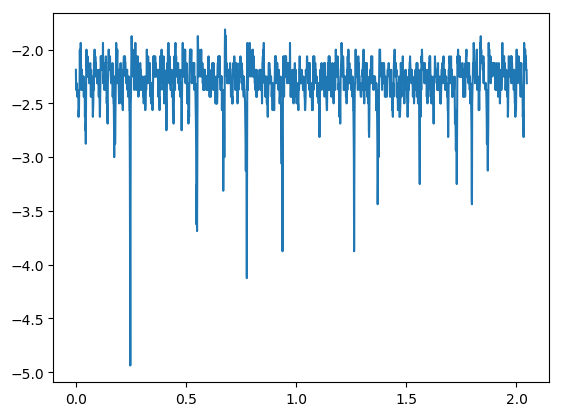

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fce24be86d8>

In [36]:
tts=arx[:sweepX]
vvs=arx[:sweepY]
plot(tts,vvs)

In [39]:
f=figure(figsize=(14,10))

for k in 1:arx[:sweepCount]
    arx[:setSweep](k)
    tts=arx[:sweepX]
    vvs=arx[:sweepY]
    plot(tts,vvs,alpha=.5,label="sweep $k")
end
legend()
ylabel(arx.sweepLabelY)
xlabel(arx.sweepLabelX)
title("pyABF and Matplotlib are a great pair!")


PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/karel/.julia/packages/PyCall/0jMpb/src/pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('Sweep 23 not available (must be 0 - 22)',)
  File "/home/karel/.local/lib64/python3.6/site-packages/pyabf/abf.py", line 465, in setSweep
    raise ValueError(msg)
